In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("/content/drive/MyDrive/price_prediction_iphone/training_data.csv")
test = pd.read_csv("/content/drive/MyDrive/price_prediction_iphone/testing_data.csv")

In [4]:
train.head()

,MODEL,VARIANT,PHYSICAL DAMAGE,SOFTWARE ISSUES,HARDWARE ISSUES,BATTERY HEALTH,KIT AVAILABLE,TARGET
0,1,16,0,0,0,85,1,2500
1,2,16,0,0,0,85,1,3500
2,3,16,0,0,0,85,1,5000
3,4,16,0,0,0,85,1,6000
4,5,16,0,0,0,85,1,5000


In [5]:
train.describe()

,MODEL,VARIANT,PHYSICAL DAMAGE,SOFTWARE ISSUES,HARDWARE ISSUES,BATTERY HEALTH,KIT AVAILABLE,TARGET
count,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,14.040656,164.095172,0.503119,0.501502,0.504274,78.332178,0.500116,21929.131670
std,6.917370,165.988915,0.500048,0.500056,0.500039,6.236044,0.500058,22729.401617
min,1.000000,16.000000,0.000000,0.000000,0.000000,70.000000,0.000000,368.000000
25%,8.000000,32.000000,0.000000,0.000000,0.000000,70.000000,0.000000,4900.000000
50%,14.000000,64.000000,1.000000,1.000000,1.000000,80.000000,1.000000,13600.000000
75%,20.000000,256.000000,1.000000,1.000000,1.000000,85.000000,1.000000,32000.000000
max,25.000000,512.000000,1.000000,1.000000,1.000000,85.000000,1.000000,145000.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MODEL            4329 non-null   int64
 1   VARIANT          4329 non-null   int64
 2   PHYSICAL DAMAGE  4329 non-null   int64
 3   SOFTWARE ISSUES  4329 non-null   int64
 4   HARDWARE ISSUES  4329 non-null   int64
 5   BATTERY HEALTH   4329 non-null   int64
 6   KIT AVAILABLE    4329 non-null   int64
 7   TARGET           4329 non-null   int64
dtypes: int64(8)
memory usage: 270.7 KB


In [7]:
test.head()

,MODEL,VARIANT,PHYSICAL DAMAGE,SOFTWARE ISSUES,HARDWARE ISSUES,BATTERY HEALTH,KIT AVAILABLE,TARGET,Unnamed: 8
0,18,128,0,0,0,85,1,37808,
1,19,128,0,0,0,85,1,49748,
2,20,128,0,0,0,85,1,59697,
3,21,128,0,0,0,85,1,69647,
4,22,128,0,0,0,85,1,84571,


In [8]:
test.describe()

,MODEL,VARIANT,PHYSICAL DAMAGE,SOFTWARE ISSUES,HARDWARE ISSUES,BATTERY HEALTH,KIT AVAILABLE,TARGET
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,14.362222,137.600000,0.771111,0.453333,0.355556,76.688889,0.542222,21265.042222
std,6.877217,151.224843,0.420585,0.498372,0.479214,6.447742,0.498769,22772.494668
min,1.000000,16.000000,0.000000,0.000000,0.000000,70.000000,0.000000,557.000000
25%,9.000000,40.000000,1.000000,0.000000,0.000000,70.000000,0.000000,4943.000000
50%,15.000000,64.000000,1.000000,0.000000,0.000000,80.000000,1.000000,13829.500000
75%,20.000000,128.000000,1.000000,1.000000,1.000000,85.000000,1.000000,28203.500000
max,25.000000,512.000000,1.000000,1.000000,1.000000,85.000000,1.000000,129841.000000


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MODEL            450 non-null    int64 
 1   VARIANT          450 non-null    int64 
 2   PHYSICAL DAMAGE  450 non-null    int64 
 3   SOFTWARE ISSUES  450 non-null    int64 
 4   HARDWARE ISSUES  450 non-null    int64 
 5   BATTERY HEALTH   450 non-null    int64 
 6   KIT AVAILABLE    450 non-null    int64 
 7   TARGET           450 non-null    int64 
 8   Unnamed: 8       450 non-null    object
dtypes: int64(8), object(1)
memory usage: 31.8+ KB


In [10]:
train['TARGET'].value_counts()

16560    31
18000    29
25760    26
28000    25
18400    23
         ..
61600     1
26775     1
37000     1
12400     1
12200     1
Name: TARGET, Length: 1210, dtype: int64

In [11]:
import matplotlib.pyplot as plt

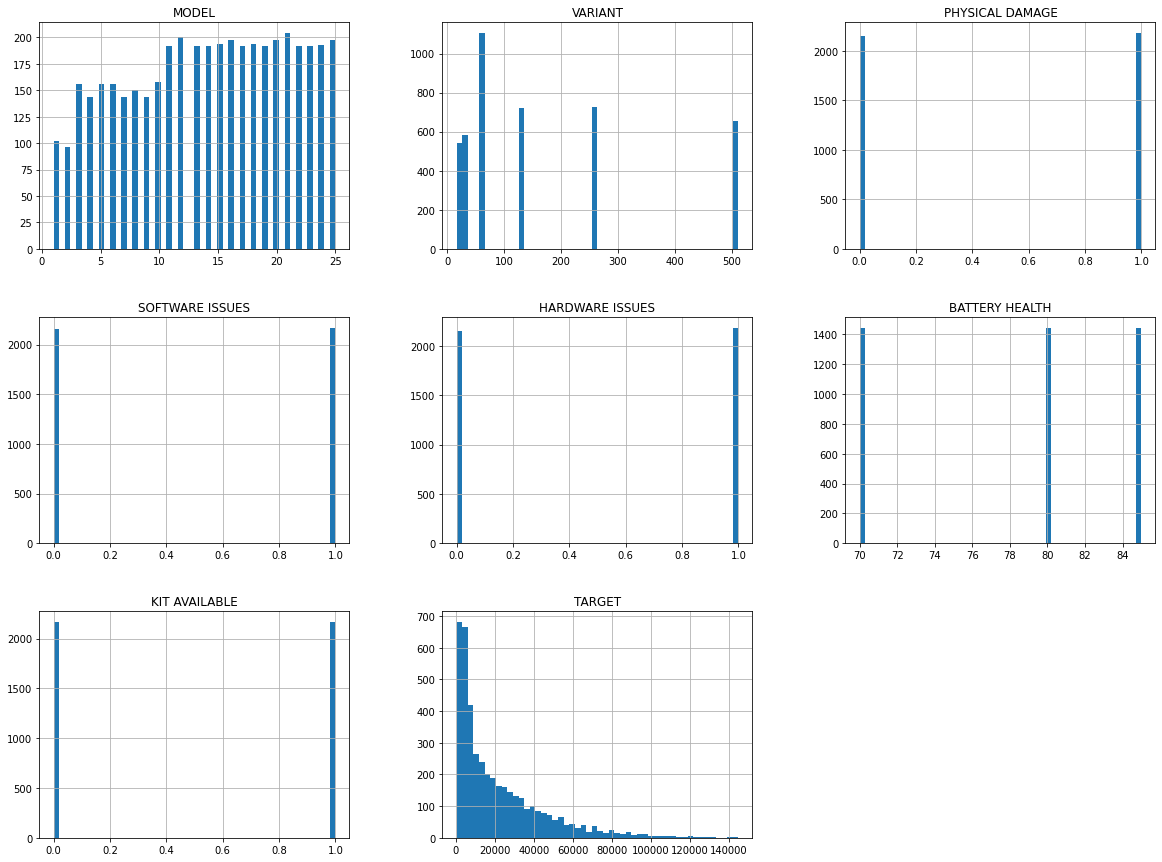

In [12]:
train.hist(bins=50 , figsize=(20,15))
plt.show()

In [13]:
corr_matrix = train.corr()

corr_matrix['TARGET'].sort_values(ascending = False)

TARGET             1.000000
MODEL              0.755200
VARIANT            0.479458
BATTERY HEALTH     0.085734
KIT AVAILABLE      0.040355
HARDWARE ISSUES   -0.187909
PHYSICAL DAMAGE   -0.221011
SOFTWARE ISSUES   -0.286525
Name: TARGET, dtype: float64

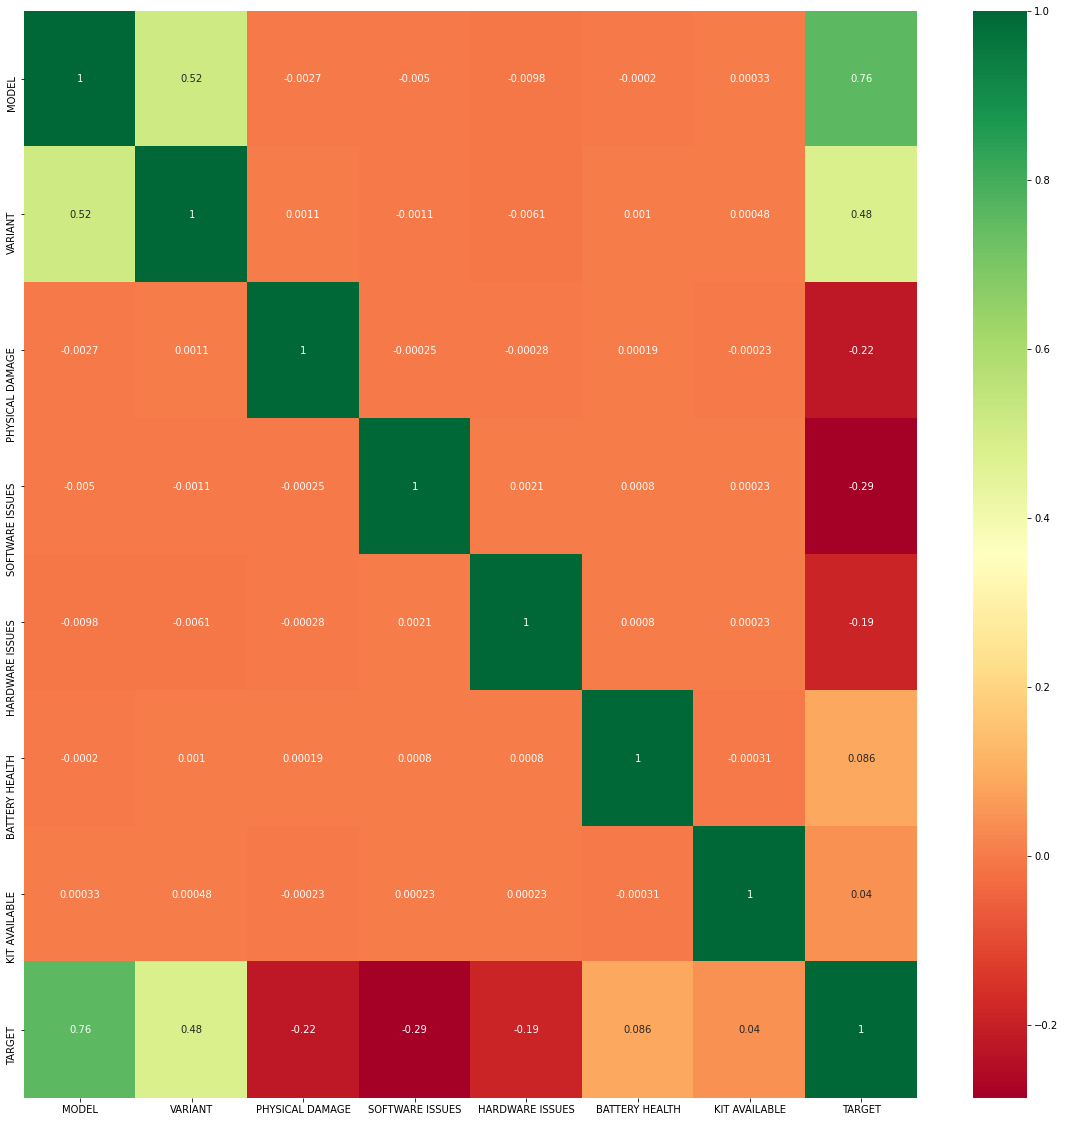

In [14]:
import seaborn as sns

plt.figure(figsize=(20,20))

g=sns.heatmap(corr_matrix,annot=True,cmap="RdYlGn")

In [15]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd18009bdd8>,
      dtype=object)

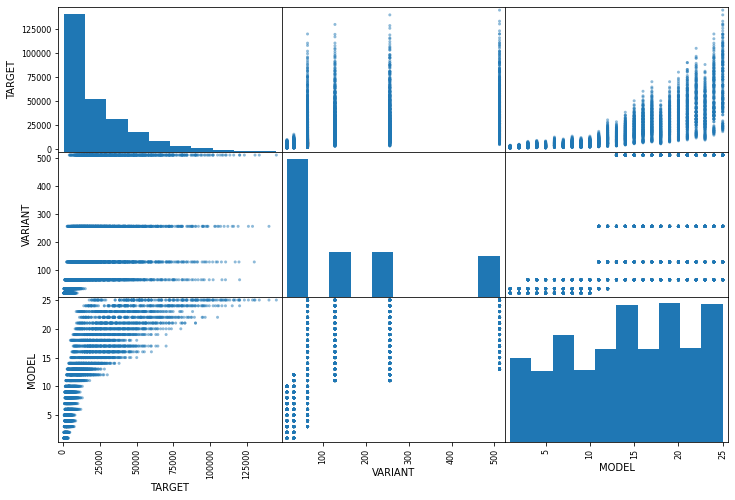

In [16]:
atr = ['TARGET','VARIANT','MODEL']
scatter_matrix(train[atr],figsize=(12,8))

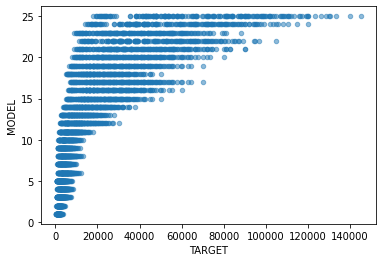

In [17]:
train.plot(kind="scatter",x='TARGET',y='MODEL',alpha=0.5)

In [18]:
train_f = train.drop('TARGET',axis=1)
train_l = train['TARGET']
test_f = test.drop('TARGET',axis=1)
test_l = test['TARGET']

In [19]:
test_f.describe()

,MODEL,VARIANT,PHYSICAL DAMAGE,SOFTWARE ISSUES,HARDWARE ISSUES,BATTERY HEALTH,KIT AVAILABLE
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,14.362222,137.600000,0.771111,0.453333,0.355556,76.688889,0.542222
std,6.877217,151.224843,0.420585,0.498372,0.479214,6.447742,0.498769
min,1.000000,16.000000,0.000000,0.000000,0.000000,70.000000,0.000000
25%,9.000000,40.000000,1.000000,0.000000,0.000000,70.000000,0.000000
50%,15.000000,64.000000,1.000000,0.000000,0.000000,80.000000,1.000000
75%,20.000000,128.000000,1.000000,1.000000,1.000000,85.000000,1.000000
max,25.000000,512.000000,1.000000,1.000000,1.000000,85.000000,1.000000


In [20]:
test_l.describe()

count       450.000000
mean      21265.042222
std       22772.494668
min         557.000000
25%        4943.000000
50%       13829.500000
75%       28203.500000
max      129841.000000
Name: TARGET, dtype: float64

In [21]:
train_f.describe()

,MODEL,VARIANT,PHYSICAL DAMAGE,SOFTWARE ISSUES,HARDWARE ISSUES,BATTERY HEALTH,KIT AVAILABLE
count,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,14.040656,164.095172,0.503119,0.501502,0.504274,78.332178,0.500116
std,6.917370,165.988915,0.500048,0.500056,0.500039,6.236044,0.500058
min,1.000000,16.000000,0.000000,0.000000,0.000000,70.000000,0.000000
25%,8.000000,32.000000,0.000000,0.000000,0.000000,70.000000,0.000000
50%,14.000000,64.000000,1.000000,1.000000,1.000000,80.000000,1.000000
75%,20.000000,256.000000,1.000000,1.000000,1.000000,85.000000,1.000000
max,25.000000,512.000000,1.000000,1.000000,1.000000,85.000000,1.000000


In [22]:
train_l.describe()

count      4329.000000
mean      21929.131670
std       22729.401617
min         368.000000
25%        4900.000000
50%       13600.000000
75%       32000.000000
max      145000.000000
Name: TARGET, dtype: float64

In [23]:
train_tr = (train_f)
test_tr = (test_f)

In [24]:
train_tr

,MODEL,VARIANT,PHYSICAL DAMAGE,SOFTWARE ISSUES,HARDWARE ISSUES,BATTERY HEALTH,KIT AVAILABLE
0,1,16,0,0,0,85,1
1,2,16,0,0,0,85,1
2,3,16,0,0,0,85,1
3,4,16,0,0,0,85,1
4,5,16,0,0,0,85,1
...,...,...,...,...,...,...,...
4324,21,512,0,1,1,70,0
4325,22,512,0,1,1,70,0
4326,23,512,0,1,1,70,0
4327,24,512,0,1,1,70,0


In [25]:
test_tr

,MODEL,VARIANT,PHYSICAL DAMAGE,SOFTWARE ISSUES,HARDWARE ISSUES,BATTERY HEALTH,KIT AVAILABLE,Unnamed: 8
0,18,128,0,0,0,85,1,
1,19,128,0,0,0,85,1,
2,20,128,0,0,0,85,1,
3,21,128,0,0,0,85,1,
4,22,128,0,0,0,85,1,
...,...,...,...,...,...,...,...,...
445,25,64,1,1,1,80,0,
446,1,32,1,1,1,80,0,
447,2,32,1,1,1,80,0,
448,3,32,1,1,1,80,0,


In [26]:
test_tr = test_tr.drop('Unnamed: 8',axis=1)

In [27]:
test_tr

,MODEL,VARIANT,PHYSICAL DAMAGE,SOFTWARE ISSUES,HARDWARE ISSUES,BATTERY HEALTH,KIT AVAILABLE
0,18,128,0,0,0,85,1
1,19,128,0,0,0,85,1
2,20,128,0,0,0,85,1
3,21,128,0,0,0,85,1
4,22,128,0,0,0,85,1
...,...,...,...,...,...,...,...
445,25,64,1,1,1,80,0
446,1,32,1,1,1,80,0
447,2,32,1,1,1,80,0
448,3,32,1,1,1,80,0


In [28]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

#model = LinearRegression()

model = DecisionTreeRegressor()

#model = RandomForestRegressor()

In [29]:
import numpy as np

In [30]:
model_random = DecisionTreeRegressor()

In [31]:
model_random.fit(train_tr , train_l)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
predictions=model_random.predict(test_tr)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


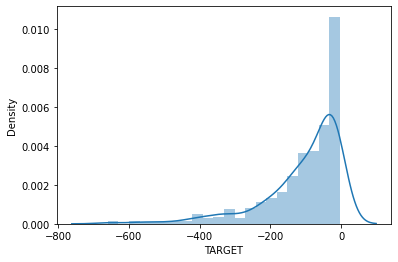

In [33]:
sns.distplot(test_l-predictions)

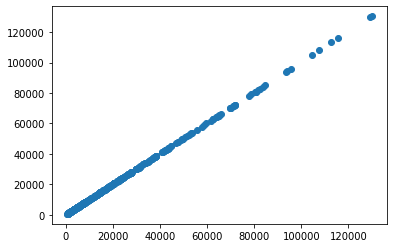

In [34]:
plt.scatter(test_l,predictions)

In [35]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_l, predictions))
print('MSE:', metrics.mean_squared_error(test_l, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_l, predictions)))

MAE: 107.86444444444444
MSE: 24965.96222222222
RMSE: 158.006209441978


In [36]:
import pickle

In [37]:
pickle.dump(model_random,open('decision_1_model.pkl','wb'))